In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:


df = pd.read_csv("Housing.csv")
df.head()
df.shape


(545, 13)

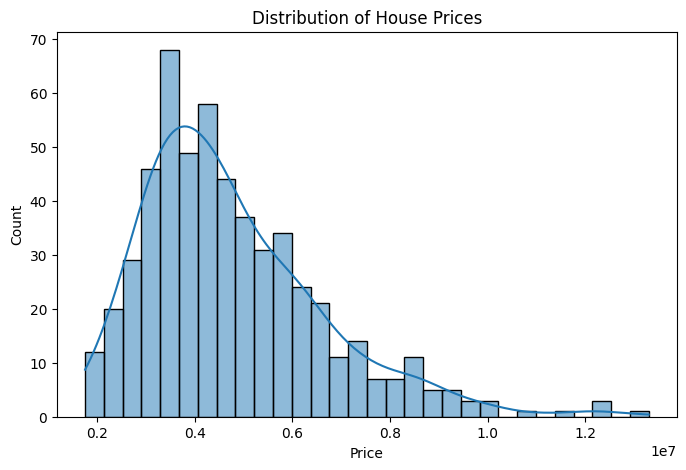

np.float64(1.2122388370279802)

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)

plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()
df['price'].skew()


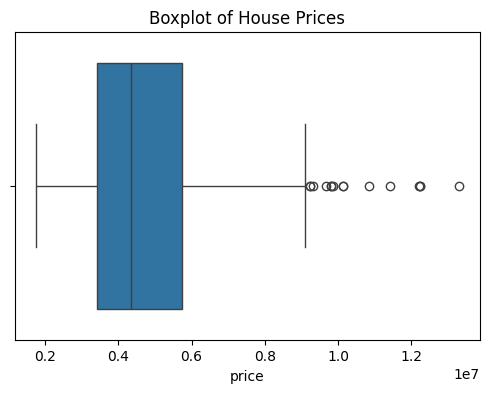

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()


In [5]:
corr = df.corr(numeric_only=True)
corr


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


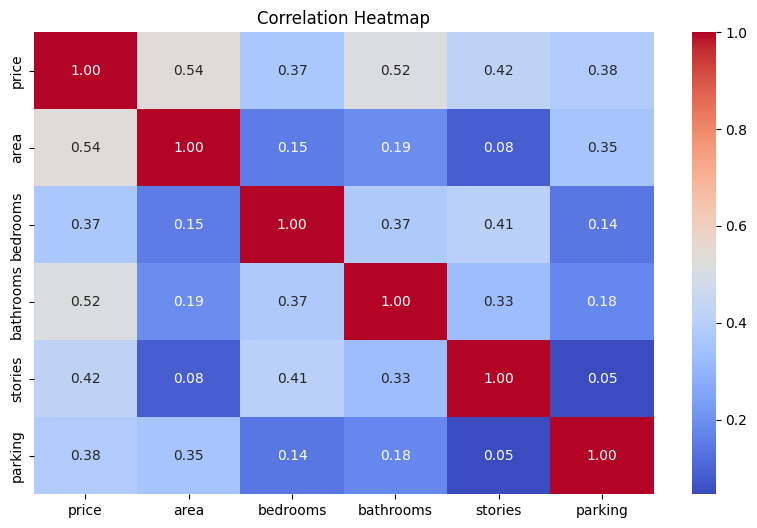

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


In [7]:
corr['price'].sort_values(ascending=False)


price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

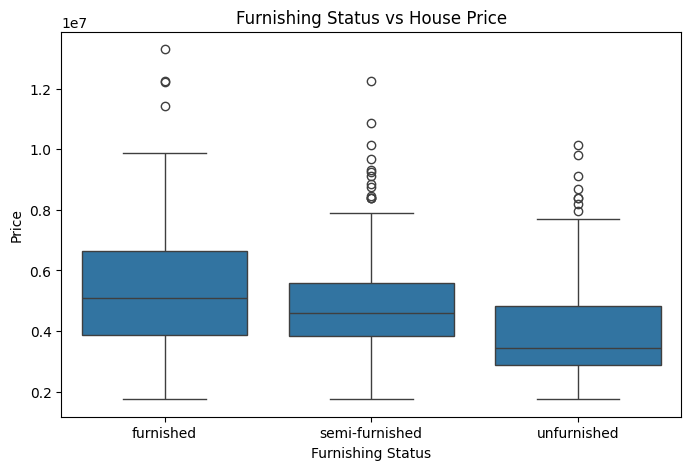

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='furnishingstatus', y='price', data=df)

plt.title("Furnishing Status vs House Price")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()


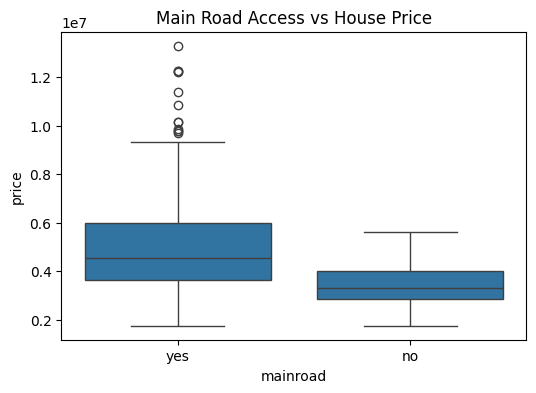

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='mainroad', y='price', data=df)

plt.title("Main Road Access vs House Price")
plt.show()


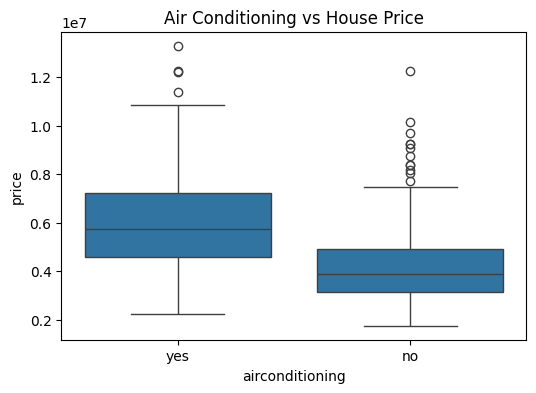

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='airconditioning', y='price', data=df)

plt.title("Air Conditioning vs House Price")
plt.show()


In [11]:
X = df.drop('price', axis=1)
y = df['price']


In [12]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
Numerical columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [13]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.astype(int)

X_encoded.head()



,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((436, 13), (109, 13))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]], shape=(436, 13))

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
y_pred = lr.predict(X_test_scaled)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 1324506.9600914402
R2 Score: 0.6529242642153176


In [19]:
print("Mean actual price:", y_test.mean())
print("RMSE as % of mean:", rmse / y_test.mean())


Mean actual price: 5007536.697247706
RMSE as % of mean: 0.26450269666908865


In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE:", rmse_ridge)
print("Ridge R2 Score:", r2_ridge)


Ridge RMSE: 1324703.4866138187
Ridge R2 Score: 0.6528212603810124


In [22]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "RMSE": [rmse, rmse_ridge],
    "R2 Score": [r2, r2_ridge]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Ridge Regression,1.324703e+06,0.652821


In [23]:
coef_compare = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Linear Coef": lr.coef_,
    "Ridge Coef": ridge.coef_
})

coef_compare.head(10)


,Feature,Linear Coef,Ridge Coef
0,area,519552.416340,518507.038230
1,bedrooms,57349.559419,58203.887057
2,bathrooms,521879.027748,520891.303462
3,stories,349251.438906,348503.409610
4,parking,192005.953667,192163.570045
5,mainroad_yes,128498.628215,128787.602807
6,guestroom_yes,88768.667686,89134.877634
7,basement_yes,187067.803214,186543.418912
8,hotwaterheating_yes,149862.702991,149497.585709
9,airconditioning_yes,365157.393851,364798.715170


In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso RMSE:", rmse_lasso)
print("Lasso R2 Score:", r2_lasso)


Lasso RMSE: 1324507.0096208123
Lasso R2 Score: 0.6529242382578193


In [25]:
lasso_coef = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Lasso Coefficient": lasso.coef_
})

lasso_coef_sorted = lasso_coef.sort_values(by="Lasso Coefficient")
lasso_coef_sorted


,Feature,Lasso Coefficient
12,furnishingstatus_unfurnished,-192015.738758
11,furnishingstatus_semi-furnished,-62837.106372
1,bedrooms,57349.528830
6,guestroom_yes,88768.630737
5,mainroad_yes,128498.592284
8,hotwaterheating_yes,149862.601102
7,basement_yes,187067.747077
4,parking,192005.922676
10,prefarea_yes,266656.298218
3,stories,349251.391677


In [26]:
zero_features = lasso_coef[lasso_coef["Lasso Coefficient"] == 0]
zero_features


,Feature,Lasso Coefficient


In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(
    random_state=42
)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2 Score:", r2_dt)


Decision Tree RMSE: 1625669.904259373
Decision Tree R2 Score: 0.4771459275854347


In [29]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree"],
    "RMSE": [rmse, rmse_ridge, rmse_dt],
    "R2 Score": [r2, r2_ridge, r2_dt]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Ridge Regression,1.324703e+06,0.652821
2,Decision Tree,1.625670e+06,0.477146


In [30]:
train_pred = dt.predict(X_train)

rmse_train = mean_squared_error(y_train, train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_pred_dt) ** 0.5

rmse_train, rmse_test


(67088.47540457372, 1625669.904259373)

In [31]:
dt_pruned = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)

rmse_pruned = mean_squared_error(y_test, y_pred_pruned) ** 0.5
r2_pruned = r2_score(y_test, y_pred_pruned)

rmse_pruned, r2_pruned


(1643522.7931214864, 0.46559904406211106)

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)


Random Forest RMSE: 1400565.9728553821
Random Forest R2 Score: 0.611918531405699


In [33]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "RMSE": [
        rmse,
        rmse_ridge,
        rmse_dt,
        rmse_rf
    ],
    "R2 Score": [
        r2,
        r2_ridge,
        r2_dt,
        r2_rf
    ]
})

final_comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Ridge Regression,1.324703e+06,0.652821
2,Decision Tree,1.625670e+06,0.477146
3,Random Forest,1.400566e+06,0.611919


In [34]:
importances = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances


,Feature,Importance
0,area,0.468430
2,bathrooms,0.151483
9,airconditioning_yes,0.062672
4,parking,0.057455
3,stories,0.057133
1,bedrooms,0.048413
12,furnishingstatus_unfurnished,0.035011
7,basement_yes,0.030823
10,prefarea_yes,0.030689
8,hotwaterheating_yes,0.017226


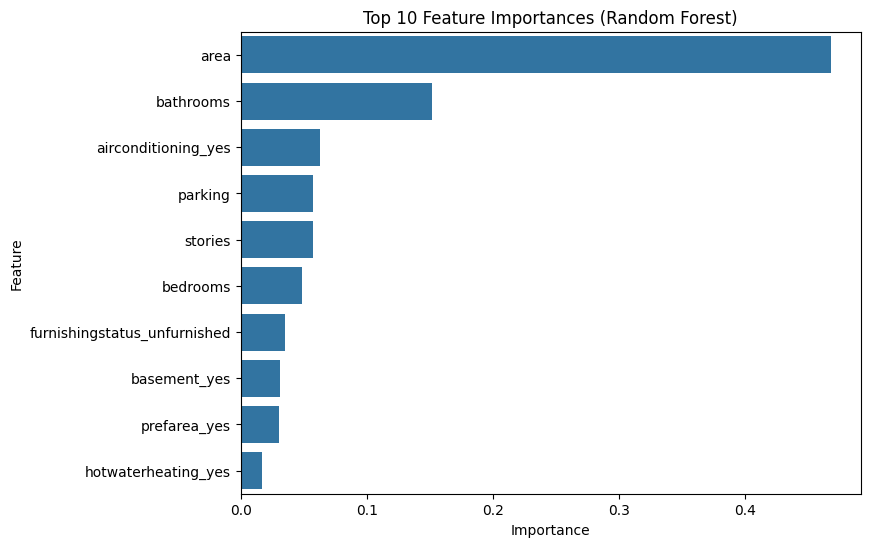

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importances.head(10)
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [36]:
rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)

rf_tuned.fit(X_train, y_train)

y_pred_rf_tuned = rf_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

rmse_rf_tuned, r2_rf_tuned


(1468388.84743849, 0.5734225261119692)

In [37]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Random Forest (default)",
        "Random Forest (tuned)"
    ],
    "RMSE": [
        rmse,
        rmse_ridge,
        rmse_rf,
        rmse_rf_tuned
    ],
    "R2 Score": [
        r2,
        r2_ridge,
        r2_rf,
        r2_rf_tuned
    ]
})

final_comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Ridge Regression,1.324703e+06,0.652821
2,Random Forest (default),1.400566e+06,0.611919
3,Random Forest (tuned),1.468389e+06,0.573423


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [5, 10, None],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid.best_params_


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [39]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)

rmse_best = mean_squared_error(y_test, y_pred_best) ** 0.5
r2_best = r2_score(y_test, y_pred_best)

rmse_best, r2_best


(1393196.5131377697, 0.6159917797923311)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr


(1286952.3334402135, 0.672326977799937)

In [41]:
final_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Random Forest (tuned)",
        "Gradient Boosting"
    ],
    "RMSE": [
        rmse,
        rmse_ridge,
        rmse_best,   # tuned RF
        rmse_gbr
    ],
    "R2 Score": [
        r2,
        r2_ridge,
        r2_best,
        r2_gbr
    ]
})

final_comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.324507e+06,0.652924
1,Ridge Regression,1.324703e+06,0.652821
2,Random Forest (tuned),1.393197e+06,0.615992
3,Gradient Boosting,1.286952e+06,0.672327


In [42]:
import joblib
joblib.dump(gbr, "house_price_model.pkl")


['house_price_model.pkl']